In [1]:
import os
import scipy
import numpy as np

In [2]:
from skimage.io import imread

/home/abhishek/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [3]:
from scipy import io

In [4]:
import matplotlib.pyplot as plt

In [5]:
data_dir = "/home/abhishek/Desktop/cognitive_robotics_lab/part_affordance_subset/clutter/clutter_test/"

In [6]:
list_depth_images = sorted([d for d in os.listdir(data_dir) if d.endswith("depth.png")])
list_color_images = sorted([c for c in os.listdir(data_dir) if c.endswith("rgb.jpg")])
list_labels = sorted([l for l in os.listdir(data_dir) if l.endswith("label.mat")])

In [7]:
pred_dir = "/home/abhishek/Desktop/cognitive_robotics_lab/object_grasp_affordance/dir_predictions_test/"

In [8]:
list_preds = sorted([p for p in os.listdir(pred_dir) if p.endswith("label.npy")])

In [9]:
num_depth_images = len(list_depth_images)

In [10]:
num_depth_images

165

In [11]:
def visualize_sample(i):
    color = imread(os.path.join(data_dir, list_color_images[i]))
    depth = imread(os.path.join(data_dir, list_depth_images[i]))
    label = io.loadmat(os.path.join(data_dir, list_labels[i]))["gt_label"]
    label = (label==1).astype(np.uint8)
    pred = np.load(os.path.join(pred_dir, list_preds[i])).astype(np.uint8)
    
    rows, cols = 2, 2
    plt.figure(figsize=(12, 12))
    plt.subplot(rows, cols, 1)
    plt.imshow(color)
    plt.title("RGB")
    
    plt.subplot(rows, cols, 2)
    plt.imshow(depth, cmap="gray")
    plt.title("Depth")
    
    plt.subplot(rows, cols, 3)
    plt.imshow(label, cmap="gray")
    plt.title("Grasp affordance label groundtruth")
    
    plt.subplot(rows, cols, 4)
    plt.imshow(pred, cmap="gray")
    plt.title("Grasp affordance label predicted")

    plt.show()
    

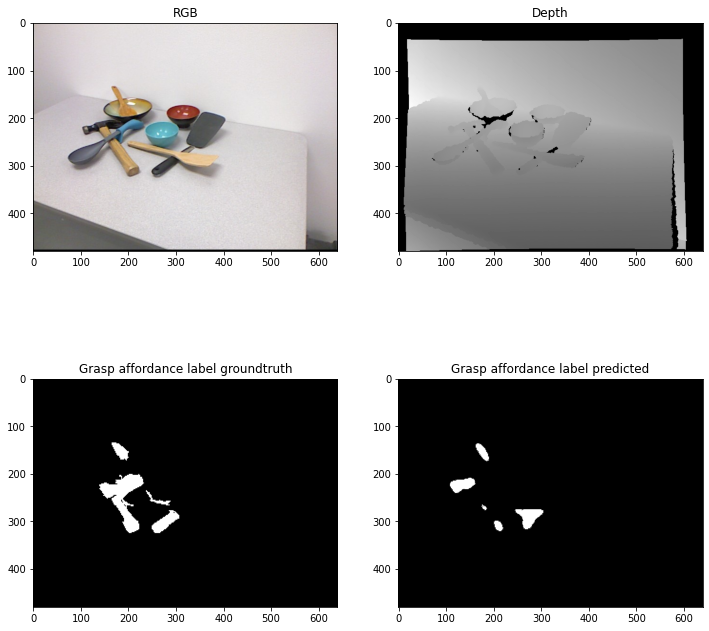

In [12]:
visualize_sample(100)

## Evaluation of passive task on test set

In [13]:
def compute_acc(label, pred):
    same = (label == pred).sum()
    a, b = label.shape
    total = a*b
    acc = same / total
    return acc

In [14]:
def compute_iou(label, pred, smooth=1e-5):
    label = label.reshape(-1)
    pred = pred.reshape(-1)
    intersection = np.logical_and(label, pred).sum() + smooth
    union = np.logical_or(label, pred).sum() + smooth
    iou = intersection / union
    return iou

In [15]:
accuracies = []
ious = []

In [16]:
for i in range(num_depth_images):
    label = io.loadmat(os.path.join(data_dir, list_labels[i]))["gt_label"]
    label = (label==1).astype(np.int32)
    pred = np.load(os.path.join(pred_dir, list_preds[i])).astype(np.int32)
    
    acc = compute_acc(label, pred)
    iou = compute_iou(label, pred)
    
    accuracies.append(acc)
    ious.append(iou)

In [17]:
accuracies = np.array(accuracies)
ious = np.array(ious)

In [18]:
np.mean(accuracies)

0.9684662444760099

In [19]:
np.mean(ious)

0.12643351999933564